In [90]:
K_FOR_CORR = 25
ROUND_DENSITY_REG=4

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from typing import List
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
# read csv to df:
path_to_csv = '/home/itay.nakash/smooth_language/results/SameInedx1300000.0.csv'
df = pd.read_csv(path_to_csv)
df = df.drop('Unnamed: 0',axis=1)
numeric_df = df.select_dtypes(include=["number"])

/tmp/ipykernel_5983/2612732189.py:10: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_to_csv)


In [92]:
mask= (df['sim'] < 0.9) & (df['layer'] == 0)
bad_rows=df.loc[mask]

# get the row numbers:
indexses=bad_rows.index
print(len(indexses))
to_drop=[]
for index in indexses:
    to_drop+=[index+i for i in range(13)]
df=df.drop(index=to_drop)

228


In [93]:
def show_all_cols(df):
    num_in_line=5
    for i,col in enumerate(df):
        if i%num_in_line==num_in_line-1:
            print(col)
        else:
            print(col,end=",  ")
show_all_cols(df)

sen1,  sen2,  sen_len1,  sen_len2,  word1
word2,  index1,  index2,  layer,  n_exampels
sim,  sim_lmghead,  std,  correct1,  correct1_cl
correct1_cl_no_norm,  correct2,  correct2_cl,  correct2_cl_no_norm,  bertscore_nm_r
bertscore_nm_p,  bertscore_nm_f1,  bertscore_m_r,  bertscore_m_p,  bertscore_m_f1
logits1_masked,  logits1_pred,  softmax1_masked,  softmax1_pred,  logits2_masked
logits2_pred,  softmax2_masked,  softmax2_pred,  logits1_masked_no_norm,  logits1_pred_no_norm
softmax1_masked_no_norm,  softmax1_pred_no_norm,  logits2_masked_no_norm,  logits2_pred_no_norm,  softmax2_masked_no_norm
softmax2_pred_no_norm,  logits1_masked_cl,  logits1_pred_cl,  softmax1_masked_cl,  softmax1_pred_cl
logits2_masked_cl,  logits2_pred_cl,  softmax2_masked_cl,  softmax2_pred_cl,  logits1_masked_cl_no_norm
logits1_pred_cl_no_norm,  softmax1_masked_cl_no_norm,  softmax1_pred_cl_no_norm,  logits2_masked_cl_no_norm,  logits2_pred_cl_no_norm
softmax2_masked_cl_no_norm,  softmax2_pred_cl_no_norm,  predic

In [94]:
def check_corr_for_col(df,target:str,num_of_col_toshow:int):
    # calculate corr matrix:
    corr_matrix = df.corr()

    # get the correlation matrix of the similarity feature:
    corr_matrix_sim=corr_matrix[target]

    # get the top_k by abs that corelate to the similarity:
    largest_abs_values = corr_matrix_sim.abs().nlargest(num_of_col_toshow)
    k_largest_values = corr_matrix_sim.loc[largest_abs_values.index]
    print(k_largest_values)

In [95]:
check_corr_for_col(numeric_df,'sim',K_FOR_CORR)

sim                          1.000000
sim_lmghead                  0.846254
layer                       -0.747481
logits1_pred_cl             -0.650544
logits2_pred_cl             -0.646402
logits1_masked_cl           -0.553634
logits2_masked_cl           -0.541852
softmax1_pred_cl            -0.406937
softmax2_pred_cl            -0.402914
logits1_masked_cl_no_norm   -0.299269
logits2_masked_cl_no_norm   -0.295367
softmax1_masked_cl          -0.285623
logits2_pred_cl_no_norm     -0.285577
logits1_pred_cl_no_norm     -0.284249
softmax2_masked_cl          -0.279041
correct1_cl                 -0.228136
correct2_cl                 -0.223395
bertscore_m_f1               0.124409
bertscore_m_p                0.115803
bertscore_m_r                0.113235
softmax2_pred_cl_no_norm    -0.068148
softmax1_pred_cl_no_norm    -0.068125
logits2_pred_no_norm        -0.059289
logits1_pred_no_norm        -0.058657
softmax2_masked_no_norm     -0.046401
Name: sim, dtype: float64


In [96]:
check_corr_for_col(numeric_df,'sim_lmghead',K_FOR_CORR)

sim_lmghead                  1.000000
sim                          0.846254
layer                       -0.637857
logits1_pred_cl             -0.523424
logits2_pred_cl             -0.519188
logits1_masked_cl           -0.427118
logits2_masked_cl           -0.415826
softmax1_pred_cl            -0.247821
softmax2_pred_cl            -0.244467
logits2_pred_cl_no_norm     -0.214444
logits1_pred_cl_no_norm     -0.211535
logits1_masked_cl_no_norm   -0.182412
logits2_masked_cl_no_norm   -0.178563
softmax1_masked_cl          -0.146740
softmax2_masked_cl          -0.141039
bertscore_m_f1               0.126388
correct1_cl                 -0.123293
correct2_cl                 -0.119056
bertscore_m_p                0.117298
bertscore_m_r                0.115456
logits2_masked               0.079766
logits1_masked               0.071613
softmax2_masked              0.051658
correct2                     0.050349
softmax1_masked              0.048034
Name: sim_lmghead, dtype: float64


In [97]:
# why here I have a negetive corr to the similarity?
check_corr_for_col(df,'softmax1_masked_cl',K_FOR_CORR)

softmax1_masked_cl           1.000000
correct1_cl                  0.867443
softmax1_pred_cl             0.735393
logits1_masked_cl            0.694905
logits1_pred_cl              0.586443
layer                        0.436888
softmax1_masked              0.422795
logits2_pred_cl              0.416088
softmax2_pred_cl             0.404620
logits2_masked_cl            0.396972
softmax2_masked_cl           0.381052
correct1                     0.360550
logits1_masked               0.342668
softmax1_pred                0.320704
correct2_cl                  0.311052
sim                         -0.289720
logits1_pred                 0.284795
logits1_masked_cl_no_norm    0.275451
sim_lmghead                 -0.147817
logits2_masked_cl_no_norm    0.139693
logits2_pred_cl_no_norm      0.110173
logits1_pred_cl_no_norm      0.109344
logits1_masked_no_norm       0.104040
softmax2_masked              0.080423
softmax2_pred                0.077719
Name: softmax1_masked_cl, dtype: float64


In [98]:
def print_reg_weights(df,model,target:str):  
    x = df.drop(target,axis=1)
    y = df[target]
    # Fit the regressor to the data
    model.fit(x, y)

    # Print the sorted weights and their corresponding column names
    weights = sorted(zip(numeric_df.columns, model.coef_), key=lambda x: abs(x[1]), reverse=True)
    for col, weight in weights:
        print(f"col: {col}, weight: {round(weight,ROUND_DENSITY_REG)} ")

In [99]:
linearRegg=LinearRegression()
print_reg_weights(numeric_df,linearRegg,'sim_lmghead')

col: index2, weight: -4374730011.092 
col: index1, weight: 4374730011.0912 
col: n_exampels, weight: 88731114.8732 
col: correct1_cl, weight: -73719636.6912 
col: correct2_cl, weight: 58195660.9107 
col: sim_lmghead, weight: 49843521.5387 
col: logits1_pred_cl_no_norm, weight: 40.5469 
col: logits2_pred_cl_no_norm, weight: 40.4503 
col: logits2_pred_no_norm, weight: 17.9239 
col: bertscore_m_p, weight: -16.9156 
col: logits1_pred_no_norm, weight: 15.7647 
col: bertscore_m_r, weight: 8.6946 
col: bertscore_nm_f1, weight: 8.6146 
col: sim, weight: 2.3702 
col: softmax2_masked_no_norm, weight: -0.4265 
col: softmax1_masked_no_norm, weight: -0.4026 
col: softmax2_masked_cl_no_norm, weight: 0.2978 
col: softmax1_masked_cl_no_norm, weight: 0.2881 
col: softmax1_masked_cl, weight: 0.0982 
col: softmax2_masked_cl, weight: 0.0962 
col: softmax1_masked, weight: -0.0598 
col: softmax2_masked, weight: -0.0583 
col: logits2_pred_cl, weight: 0.0472 
col: logits1_pred_cl, weight: 0.0471 
col: bertsco

In [100]:
linearRegg=LinearRegression()
print_reg_weights(numeric_df,linearRegg,'sim')

col: index1, weight: 254803227.0453 
col: index2, weight: -254803227.0452 
col: sim_lmghead, weight: 2387252.0863 
col: correct1_cl, weight: 1964405.9745 
col: n_exampels, weight: 1871807.265 
col: correct2_cl, weight: 89619.4878 
col: logits1_pred_cl_no_norm, weight: -13.7924 
col: logits2_pred_cl_no_norm, weight: -12.6257 
col: logits2_pred_no_norm, weight: -6.8945 
col: logits1_pred_no_norm, weight: -6.1402 
col: bertscore_m_p, weight: -3.1635 
col: bertscore_nm_f1, weight: 1.6657 
col: bertscore_m_r, weight: 1.6567 
col: sim, weight: 0.2164 
col: softmax2_masked_cl_no_norm, weight: -0.1469 
col: softmax1_masked_cl_no_norm, weight: -0.1442 
col: softmax2_masked_no_norm, weight: 0.1177 
col: softmax1_masked_no_norm, weight: 0.1072 
col: bertscore_nm_p, weight: -0.075 
col: correct2_cl_no_norm, weight: 0.0453 
col: bertscore_nm_r, weight: 0.0359 
col: softmax1_masked, weight: 0.0168 
col: softmax2_masked, weight: 0.0157 
col: softmax1_masked_cl, weight: -0.0122 
col: softmax2_masked_c

In [101]:
# currently zero, maybe change regulation. but I guess it say its hard to predict the sim by those features.
lasso=Lasso()
print_reg_weights(numeric_df,lasso,'sim')

col: sen_len1, weight: -0.0 
col: sen_len2, weight: -0.0 
col: index1, weight: -0.0 
col: index2, weight: -0.0 
col: layer, weight: -0.0 
col: n_exampels, weight: 0.0 
col: sim, weight: 0.0 
col: sim_lmghead, weight: 0.0 
col: std, weight: 0.0 
col: correct1, weight: -0.0 
col: correct1_cl, weight: 0.0 
col: correct1_cl_no_norm, weight: 0.0 
col: correct2, weight: -0.0 
col: correct2_cl, weight: 0.0 
col: correct2_cl_no_norm, weight: -0.0 
col: bertscore_nm_r, weight: -0.0 
col: bertscore_nm_p, weight: -0.0 
col: bertscore_nm_f1, weight: 0.0 
col: bertscore_m_r, weight: 0.0 
col: bertscore_m_p, weight: 0.0 
col: bertscore_m_f1, weight: -0.0 
col: logits1_masked, weight: -0.0 
col: logits1_pred, weight: 0.0 
col: softmax1_masked, weight: -0.0 
col: softmax1_pred, weight: -0.0 
col: logits2_masked, weight: -0.0 
col: logits2_pred, weight: 0.0 
col: softmax2_masked, weight: -0.0 
col: softmax2_pred, weight: -0.0 
col: logits1_masked_no_norm, weight: -0.0 
col: logits1_pred_no_norm, weight

<AxesSubplot:xlabel='softmax1_masked_cl', ylabel='sim'>

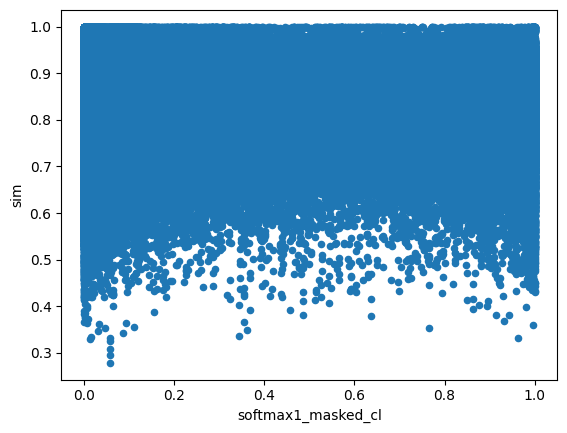

In [102]:
df.plot.scatter(x='softmax1_masked_cl',y='sim', cmap='viridis')

<AxesSubplot:xlabel='layer', ylabel='sim'>

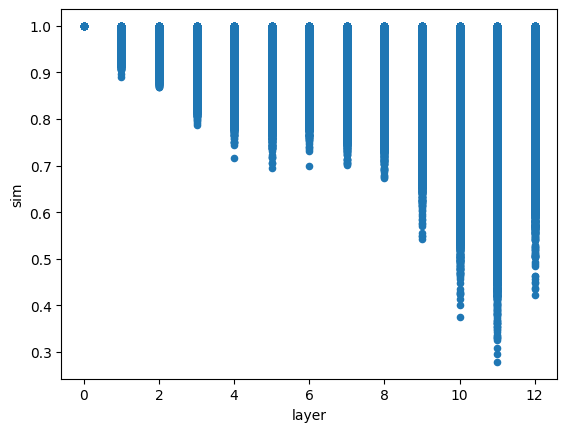

In [103]:
# TODO: remove all "mistakes" (few examples where the sim is not 1 in layer 0)

# thats a bit weird? why there are strict holes in spesific layers? there isn't any real pattern I think,
# so I'm not sure if its meaningful, but maybe can show how 'dicotomic' the model is in different layers?
df.plot.scatter(x='layer',y='sim', cmap='viridis')

In [104]:
def plot_mean_of_two_cols(df,x_str:str,y_str:str):
    mean_y_by_x = df.groupby(x_str)[y_str].mean()

    ax= mean_y_by_x.plot(x=x_str,y=y_str,kind='line')

    ax.set_ylabel(y_str)
    ax.set_xlabel(x_str)
    plt.show()

In [105]:
def plot_by_column(df, x_col, y1_col, y2_col):
  # Create a figure and a set of subplots
  fig, ax = plt.subplots()

  # Group the DataFrame by the group column
  grouped = df.groupby(x_col)

  # Iterate over the groups and plot each group
  for name, group in grouped:
    ax.plot(group[x_col], group[y1_col], label=f'{y1_col} ({name})')
    ax.plot(group[x_col], group[y2_col], label=f'{y2_col} ({name})')

  # Add a legend
  ax.legend()

  # Show the plot
  plt.show()

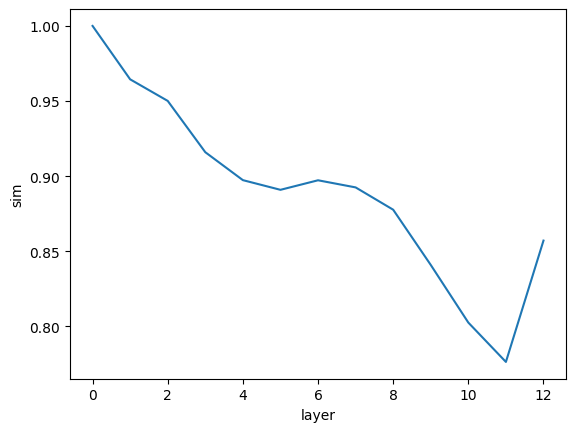

In [106]:
plot_mean_of_two_cols(df,x_str='layer',y_str='sim')

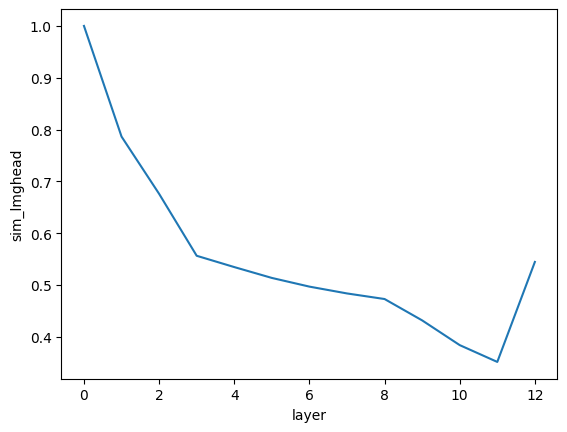

In [107]:
plot_mean_of_two_cols(df,x_str='layer',y_str='sim_lmghead')

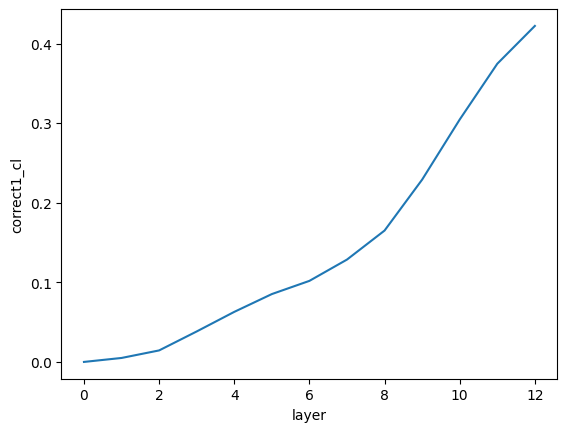

In [108]:
plot_mean_of_two_cols(df,x_str='layer',y_str='correct1_cl')


In [109]:
#similar results:
#df_pred1_incorrect=df[df['correct1']==0]
#plot_mean_of_two_cols(df_pred1_incorrect,x_str='layer',y_str='softmax1_pred_cl')

In [110]:
#only examples from layers 4-7: 
# we can see that in those layers, the bertscore is more correlated to the similarity.
df_mid_layers=df[(df['layer'] >= 4) & (df['layer'] <= 7)]
check_corr_for_col(df_mid_layers,'sim',K_FOR_CORR)

sim                          1.000000
sim_lmghead                  0.815950
bertscore_m_f1               0.264869
bertscore_m_p                0.245114
bertscore_m_r                0.242611
logits2_masked_cl            0.150061
logits1_masked_cl            0.141011
logits2_pred_no_norm        -0.119230
logits1_pred_no_norm        -0.116431
softmax2_masked_cl           0.106634
logits2_pred_cl_no_norm     -0.101504
logits1_pred_cl_no_norm     -0.098323
logits1_masked_no_norm      -0.097342
softmax1_masked_cl           0.096520
logits2_masked_no_norm      -0.093287
correct2_cl                  0.089491
softmax2_masked_no_norm     -0.087480
correct1_cl                  0.082011
softmax1_masked_no_norm     -0.081133
sen_len1                    -0.076525
sen_len2                    -0.070950
logits1_masked_cl_no_norm   -0.067670
index1                      -0.067416
index2                      -0.067416
logits2_masked_cl_no_norm   -0.064848
Name: sim, dtype: float64


<AxesSubplot:xlabel='bertscore_m_f1'>

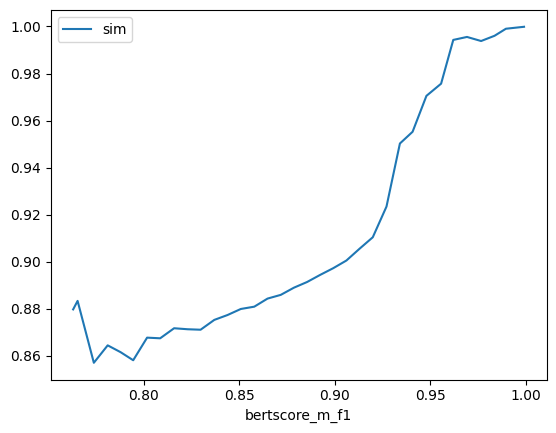

In [120]:
#doesnt make sense, need to fix it:

# Calculate the bin size
bin_size = 0.007

# Group the data by the binned x values and compute the mean y value for each group
binned_data = df.groupby(pd.cut(df['bertscore_m_f1'], np.arange(0, 1+bin_size, bin_size))).mean()

# Plot the binned data
binned_data.plot(x='bertscore_m_f1', y='sim', kind='line')

<AxesSubplot:xlabel='bertscore_m_f1'>

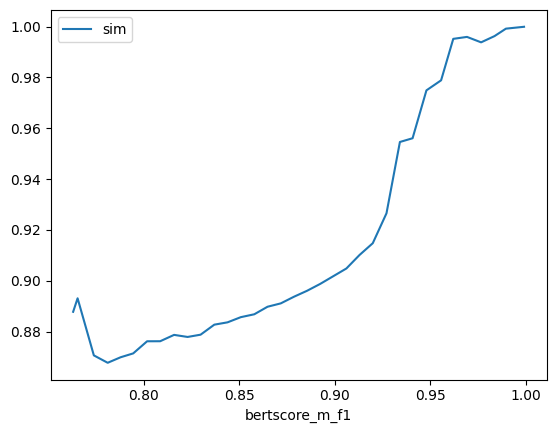

In [121]:
#doesnt make sense, need to fix it:

# Calculate the bin size
bin_size = 0.007

# Group the data by the binned x values and compute the mean y value for each group
binned_data = df_mid_layers.groupby(pd.cut(df_mid_layers['bertscore_m_f1'], np.arange(0, 1+bin_size, bin_size))).mean()

# Plot the binned data
binned_data.plot(x='bertscore_m_f1', y='sim', kind='line')

<AxesSubplot:xlabel='bertscore_m_f1', ylabel='sim_lmghead'>

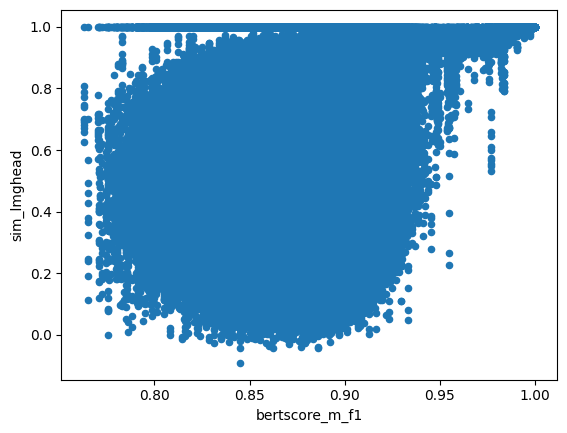

In [111]:
df.plot.scatter(x='bertscore_m_f1',y='sim_lmghead', cmap='viridis')

In [112]:
def createHeatMap(x,y):
    plt.hexbin(x,y)
    # Add a colorbar
    plt.colorbar()

    # Show the plot
    plt.show()

def corrHeatmap(df):
    # too many features, not informative:
    corr_matrix = df.corr()
    # Create a heatmap of the correlation matrix
    sns.heatmap(corr_matrix, 
            cmap="YlGnBu", 
            annot=True, 
            fmt=".2f")

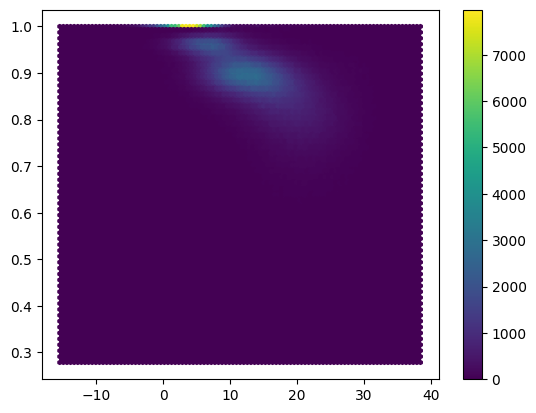

In [113]:
x=df['logits1_pred_cl']
y=df['sim']
createHeatMap(x,y)

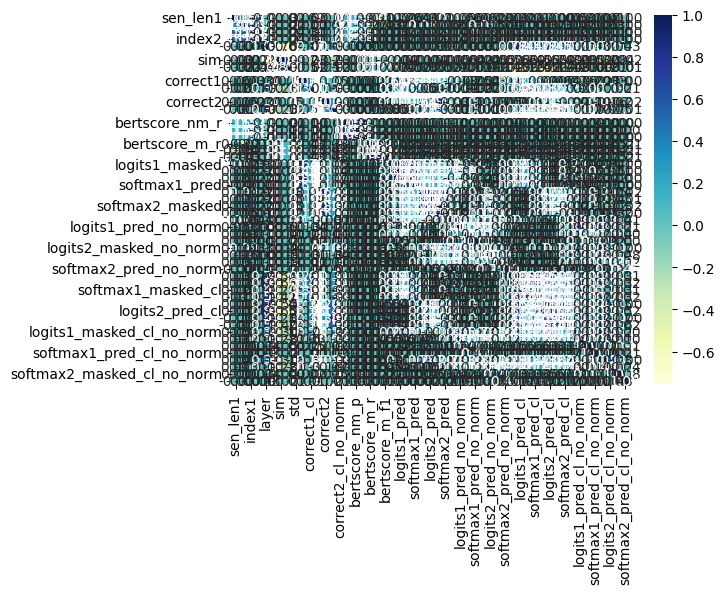

In [114]:
corrHeatmap(df)